# **Predict behavior to retain customers**

- [1. Exploring The Dataset](#a)
    - [1.1 Load The Datset](#1.1)
    - [1.2 Data Description](#1.2)
    - [1.3 Data Cleaning](#1.3)
        - [1.3.1 Missing Value](#1.3.1)
        - [1.3.2 Duplicated](#1.3.2)
        - [1.3.3 Outliter](#1.3.3)
- [2. Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Gender, Seniority, Partner and Pependends](#2.1)
    - [2.2 Services](#2.2)
    - [2.3 Security_support](#2.3)
    - [2.4 Contract type](#2.4)
    - [2.5 Churn analysis based on paying options](#2.5)
    - [2.6 Churn analysis based on tenure group](#2.6)
    - [2.7 Charges](#2.7)
- [3. Data Visualization](#3)
- [4. Data preprocessing and feature engineering](#4)
    - [4.1 Min-Max Scaling](#4.1)
    - [4.2 Encoding Categorical Variables](#4.2)
        - [4.2.1 Label Encoding](#4.2.1)
        - [4.2.2 One hot Encoding](#4.2.2)
- [5. Data Splitting and Model Building](#5)
   - [5.1 Data Splitting](#5.1)
   - [5.2 Model Buiding](#5.2)
       - [5.2.1 Feature selection](#5.2.1)
           - [5.2.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
           - [5.2.1.2 Model building using L1 Regularization](#5.2.1.2)
       - [5.2.2 Feature importance](#5.2.2)
- [6. Model Evaluation](#6) 
- [7 Save Model](#7)

# 1| **Exploring the Dataset**

In [3]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sum
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ChurnDataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
def categorical_var(df):
    cate_var = []
    for col in df.columns:
        if df[col].dtype == 'O':
            cate_var.append(col)
    return cate_var

In [9]:
categorical_var(df)

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [10]:
# Or
df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [11]:
# Or 
cate_variable = [col for col in df.columns if df[col].dtypes == 'O']
cate_variable

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [12]:
num_var = [col for col in df.columns if not col in cate_variable]
num_var

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [13]:
df['tenure'].mean()

32.37114865824223

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# Check Missing Values with Empty
empty_id = []
for col in cate_variable + num_var:
    empty_counts = df[col].value_counts().get('' or ' ')
    empty_indexs = df[df[col] == ' '].index
    if empty_counts is not None:
        print(f"Empty values in {col}: {empty_counts}, indexs = {list(empty_indexs)}" )
        empty_id = empty_id+list(empty_indexs)
    else: print(f"Empty values in {col}: 0")

Empty values in customerID: 0
Empty values in gender: 0
Empty values in Partner: 0
Empty values in Dependents: 0
Empty values in PhoneService: 0
Empty values in MultipleLines: 0
Empty values in InternetService: 0
Empty values in OnlineSecurity: 0
Empty values in OnlineBackup: 0
Empty values in DeviceProtection: 0
Empty values in TechSupport: 0
Empty values in StreamingTV: 0
Empty values in StreamingMovies: 0
Empty values in Contract: 0
Empty values in PaperlessBilling: 0
Empty values in PaymentMethod: 0
Empty values in TotalCharges: 11, indexs = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
Empty values in Churn: 0
Empty values in SeniorCitizen: 0
Empty values in tenure: 0
Empty values in MonthlyCharges: 0


In [16]:
data = df.copy()

In [17]:
data1 = data.drop(empty_id, axis=0).reset_index()

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [19]:
data1['tenure'] =data1['tenure'].replace({0:30})

In [20]:
data1['TotalCharges'] = data1['TotalCharges'].astype(float)

In [21]:
data1.describe()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3521.562144,0.162400,32.421786,64.798208,2283.300441
std,2032.832448,0.368844,24.545260,30.085974,2266.771362
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,1762.750000,0.000000,9.000000,35.587500,401.450000
50%,3521.500000,0.000000,29.000000,70.350000,1397.475000
75%,5282.250000,0.000000,55.000000,89.862500,3794.737500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [22]:
col = ['TotalCharges', 'MonthlyCharges', 'tenure']
data2 = data1[col]

<Axes: >

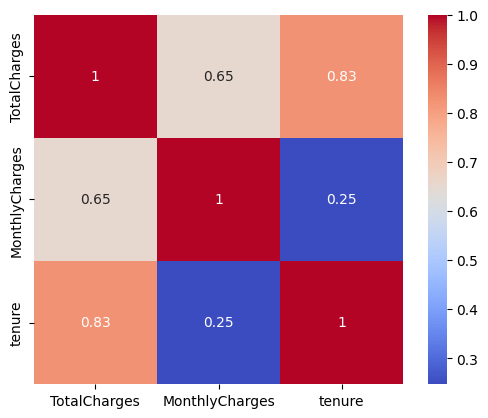

In [23]:
sns.heatmap(data2.corr(method="pearson"), annot=True, square=True, cmap='coolwarm')

In [24]:
y = data2.TotalCharges
x = data2.drop(columns=['TotalCharges'], axis=1)

In [25]:
data2.shape

(7032, 3)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

l1 = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
l1.fit(x_train, y_train)

LinearRegression()

In [27]:
l1.score(x_test, y_test)

0.9004783340563838

In [28]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Use linear Regression to fill out the empty value row by using tenure and monthly charge

In [29]:
replace = np.array([[52.55 ,30],[20.25 ,30],[80.85,30],[25.75,30], [56.05,30],[19.85,30],[25.35,30],
           [20.00 ,30],[ 19.70,30],[73.35,30],[61.90,30]])
replacement_list = l1.predict(replace)

In [30]:
replacement_list

array([1688.90528601,  535.44007572, 2699.52650741,  731.85056045,
       1813.89377629,  521.15567683,  717.56616156,  526.51232642,
        515.79902725, 2431.69402824, 2022.80311004])

In [31]:
empty_indices = df[df['TotalCharges'] == ' '].index
df.loc[empty_indices, 'TotalCharges'] = replacement_list

In [32]:
replacement_list[:len(empty_indices)]

array([1688.90528601,  535.44007572, 2699.52650741,  731.85056045,
       1813.89377629,  521.15567683,  717.56616156,  526.51232642,
        515.79902725, 2431.69402824, 2022.80311004])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Check duplicate

In [35]:
duplicated_row = df[df.duplicated()]

if len(duplicated_row) > 0:
    print(f"The following rows are duplicated: ")
    print(duplicated_row)
else: 
    print("No duplicated rows")

No duplicated rows


In [36]:
df = df.drop('customerID', axis=1)

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check for potential outlier

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.751221
std,0.368612,24.559481,30.090047,2265.565979
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.300000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [39]:
plt.figure(figsize=(15, 10))
fig = px.histogram(data2, x='TotalCharges', marginal='box', nbins=50, title='Total Charges Distribution')
fig.show()

<Figure size 1500x1000 with 0 Axes>

In [40]:
plt.figure(figsize=(15, 10))
fig = px.box(df, x='Churn', y='TotalCharges', color='Churn')
fig.show()


<Figure size 1500x1000 with 0 Axes>

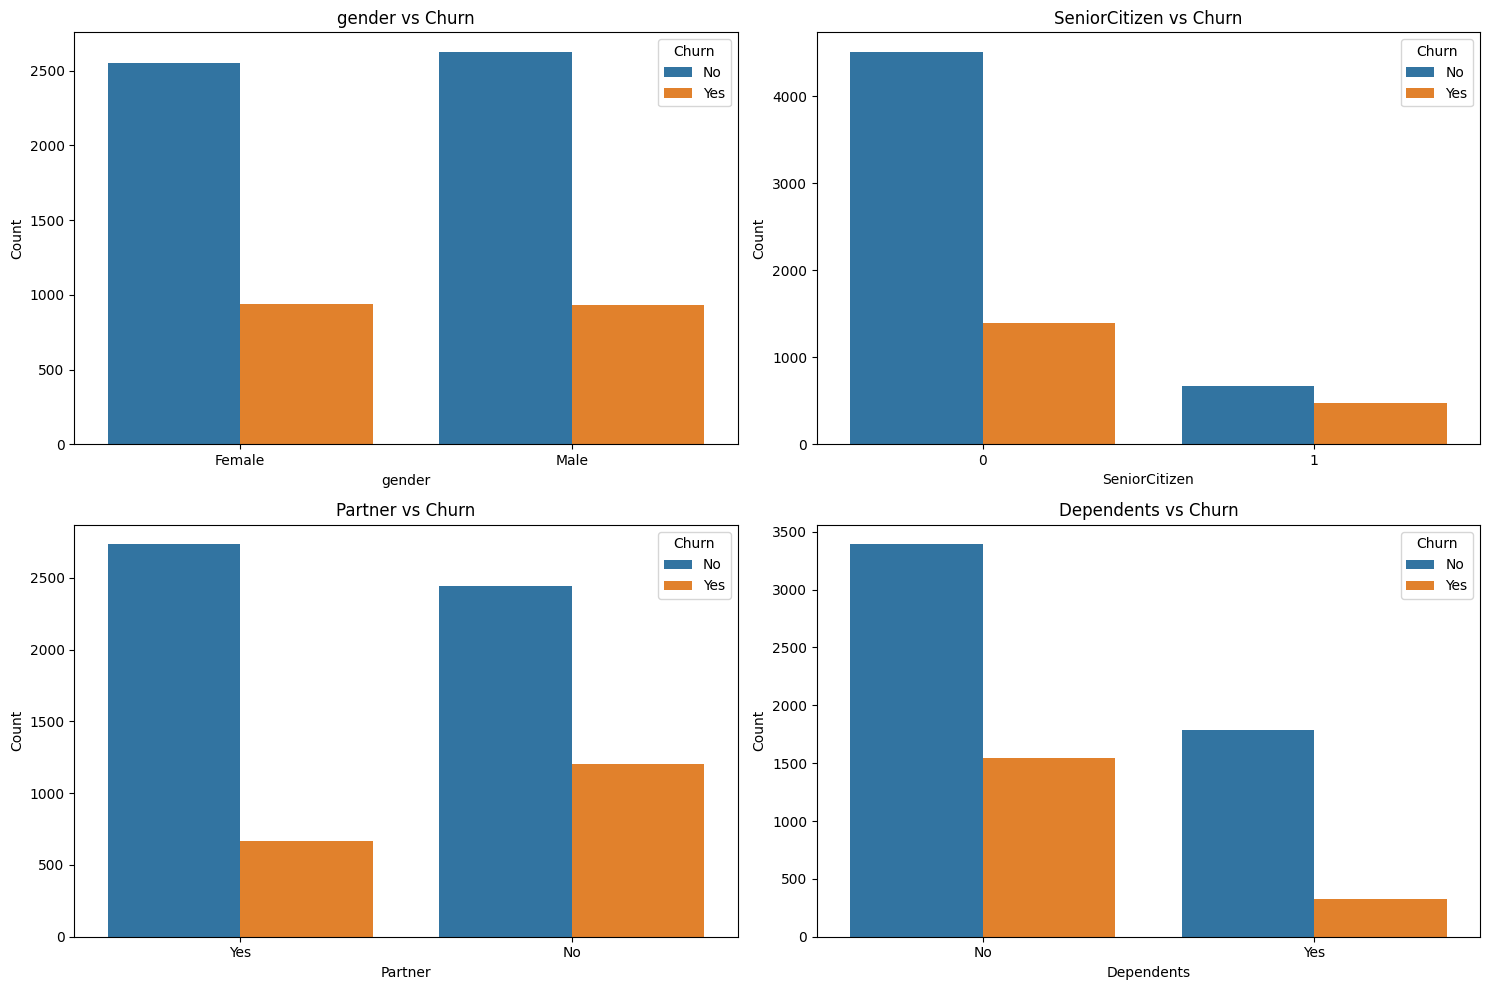

In [41]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(2,2, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(x=cols[i], data=df, hue='Churn', ax=ax)
        ax.set_title(f'{cols[i]} vs Churn')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

* Gender makes **no difference** whether the customer will churn ot not.
* Non-Senoir citizens churn more than.....

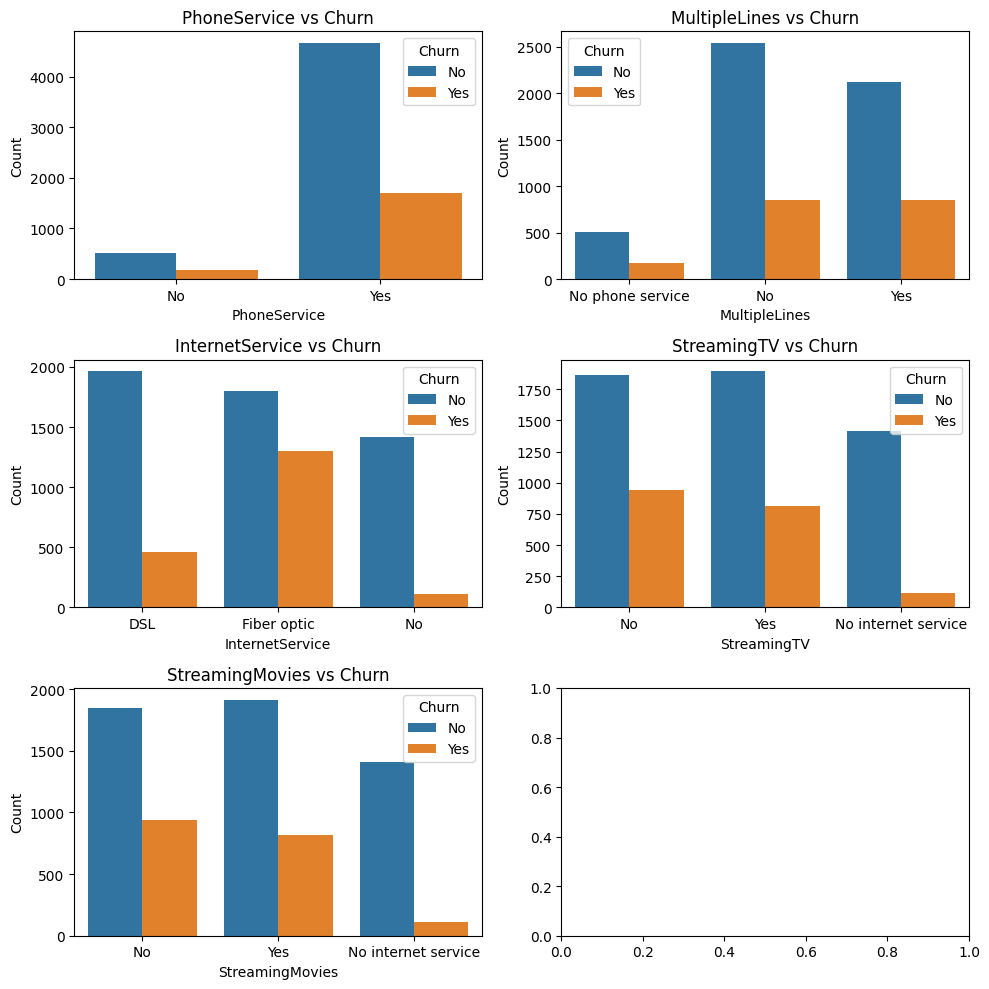

In [42]:
sv = df[['Churn', 'PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies']]
name_col = sv.columns[1:]
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    if i < len(name_col):
        sns.countplot(x=name_col[i], data=sv, hue='Churn', ax=ax)
        ax.set_title(f'{name_col[i]} vs Churn')
        ax.set_xlabel(name_col[i])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

- This is clear that StreamoingTV has no impact **on churn** rate.
- For those who use **Fiber optic** tend to **churn significantly** than ones that use DSL


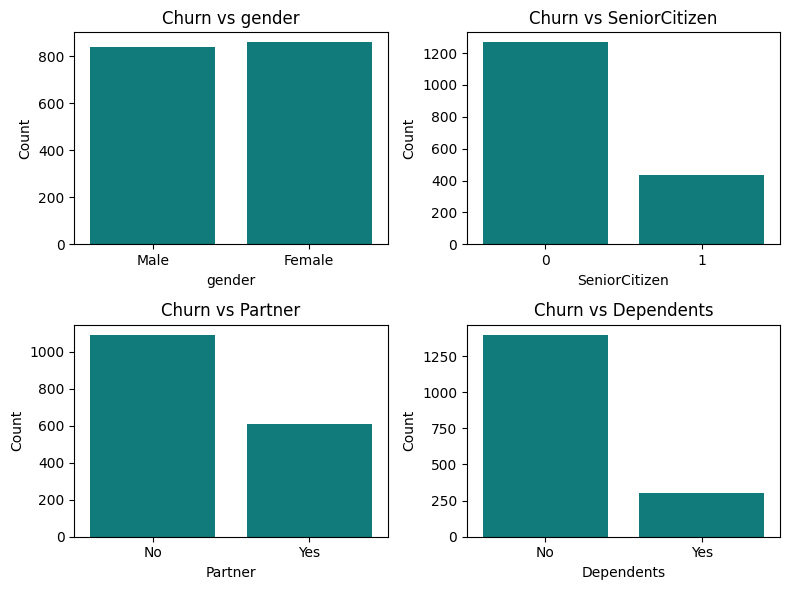

In [43]:
ph_churn = df[(df.PhoneService=='Yes') & (df.Churn=='Yes')]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=ph_churn, x=cols[i], color='darkcyan', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

- According to this, we can conclude that customers who have churned and use phone service are likely to be non-senoirs, without partners and dependents.

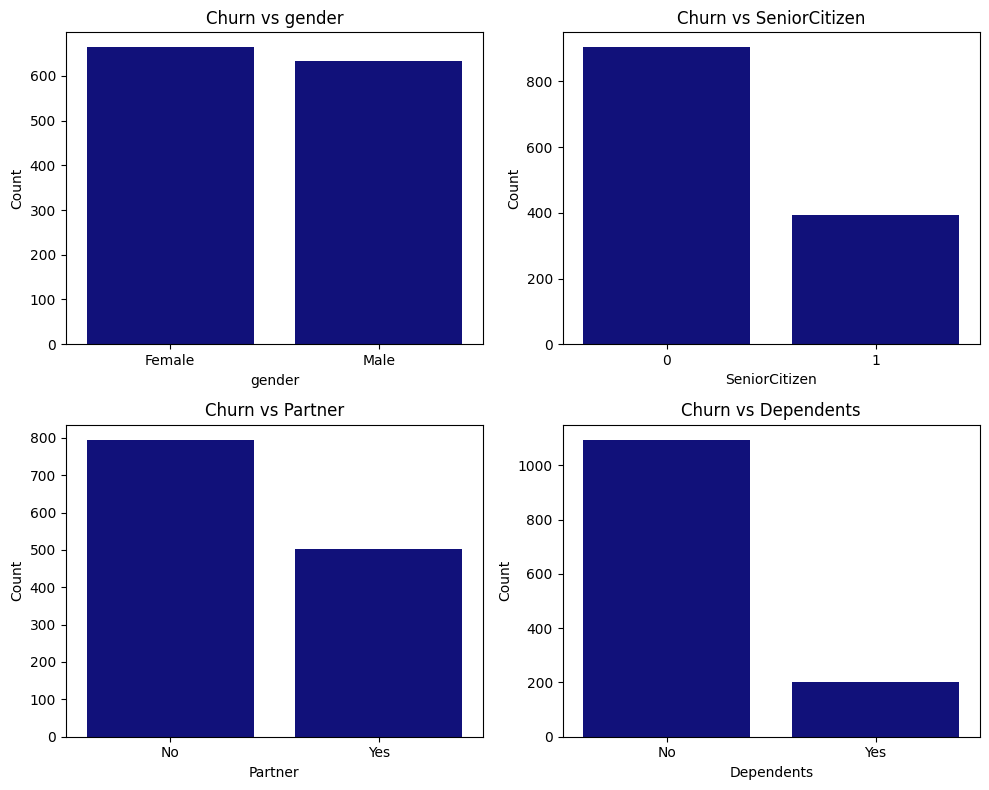

In [44]:
fiber_churn = df[(df.InternetService == 'Fiber optic') & (df.Churn == 'Yes')]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for t, ax in enumerate(axes.flat):
    if t <len(cols):
        sns.countplot(data=fiber_churn, x=cols[t], color = 'darkblue', ax=ax)
        ax.set_title(f'Churn vs {cols[t]}')
        ax.set_xlabel(cols[t])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

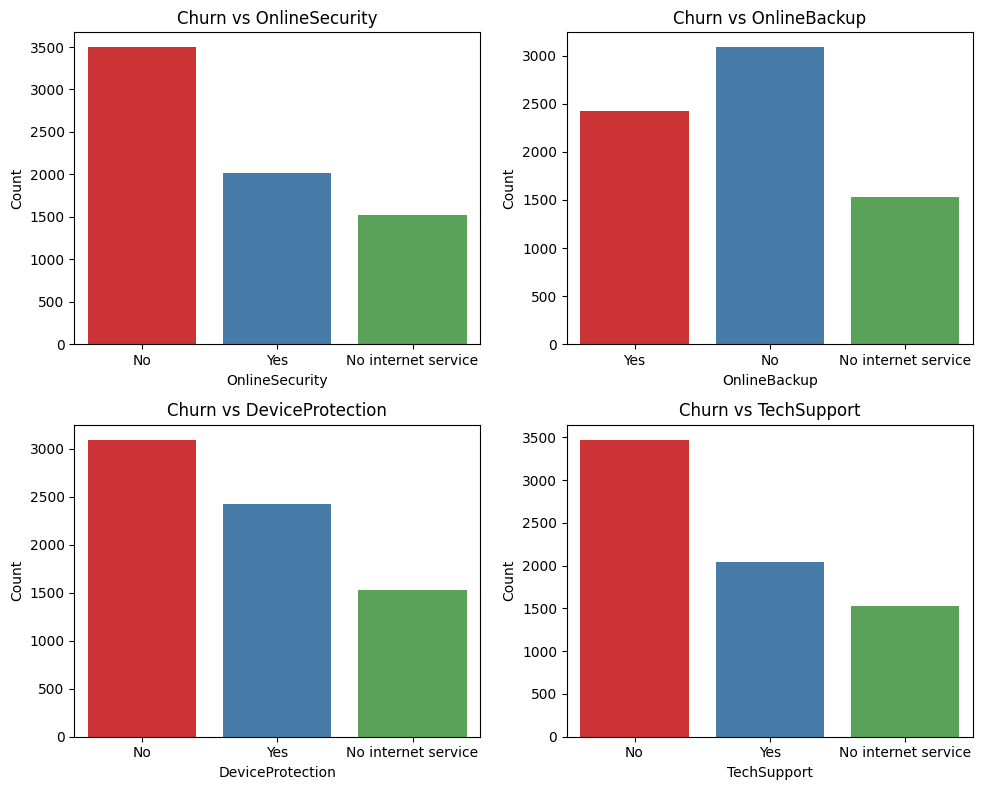

In [45]:
security_support = df[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = security_support.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i, axes in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=security_support, x=cols[i], palette='Set1', ax=axes)
        axes.set_title(f'Churn vs {cols[i]}')
        axes.set_xlabel(cols[i])
        axes.set_ylabel('Count')
plt.tight_layout()
plt.show()

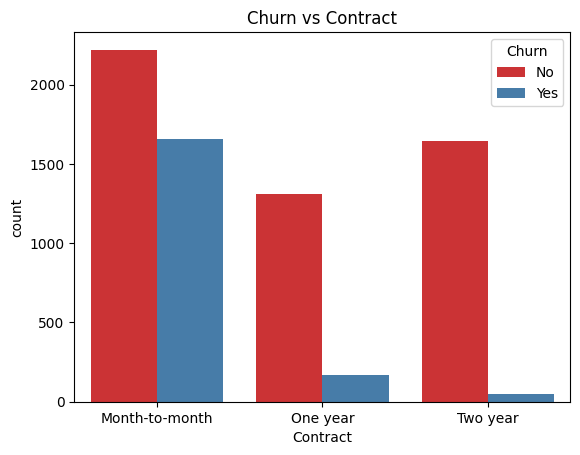

In [46]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn vs Contract')
plt.show()

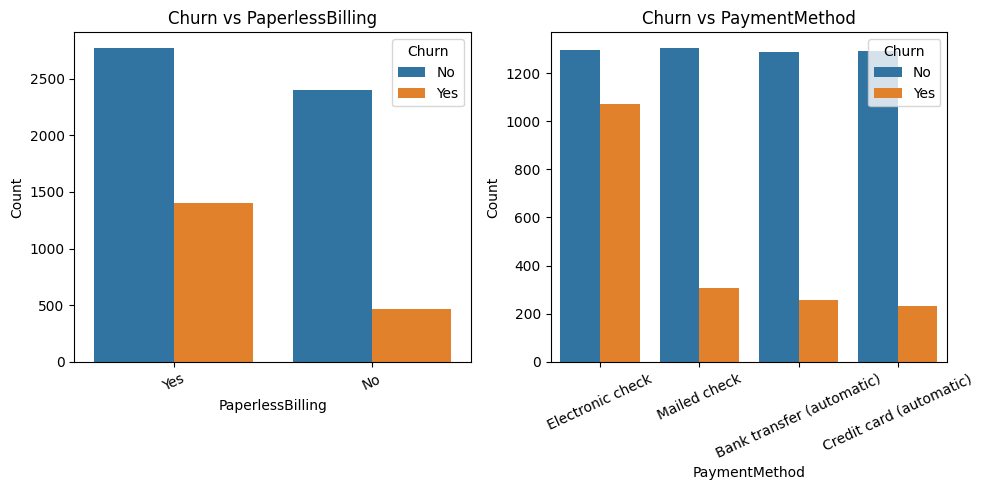

In [47]:
payment_option = df[['Churn', 'PaperlessBilling', 'PaymentMethod']]
cols = payment_option.columns[1:]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=payment_option, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
plt.tight_layout()
plt.show()

lmplot combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

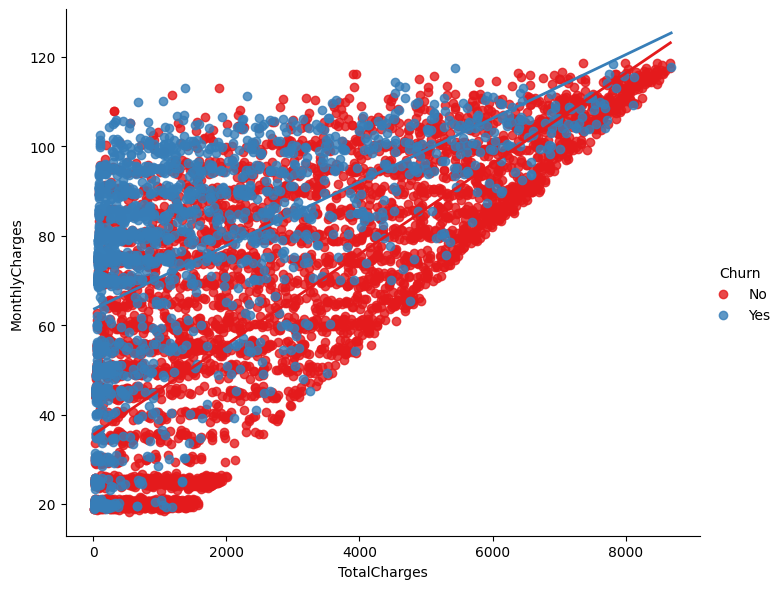

In [48]:
import seaborn as sns

sns.lmplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', ci=None, height=6, aspect=1.2, palette='Set1', line_kws={'linewidth': 2})
sns.despine()
plt.show()

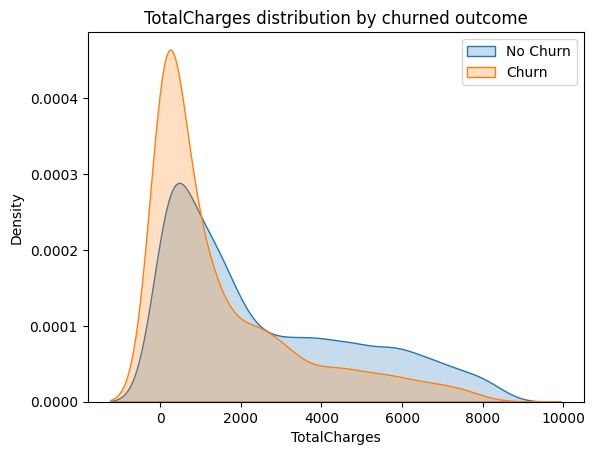

In [49]:
sns.kdeplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('TotalCharges')
plt.title('TotalCharges distribution by churned outcome')
plt.show()

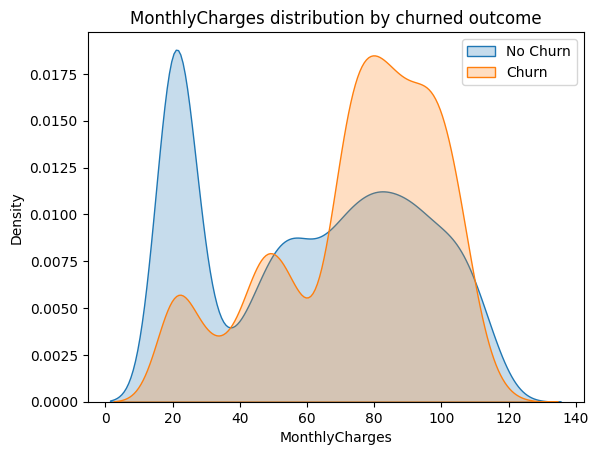

In [50]:
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('MonthlyCharges')
plt.title('MonthlyCharges distribution by churned outcome')
plt.show()

In [51]:
churn_monthly = pd.Series([df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(),
                           df[df['Churn'] == 'No']['MonthlyCharges'].mean()],
                          index=['Churned', 'Non-Churned'])
churn_total = pd.Series([df[df['Churn'] == 'Yes']['TotalCharges'].mean(),
                       df[df['Churn'] == 'No']['TotalCharges'].mean()],
                       index = ['Churned', 'Non-Churned'])
print(churn_monthly)
print(churn_total)

Churned        74.441332
Non-Churned    61.265124
dtype: float64
Churned        1531.796094
Non-Churned    2552.656928
dtype: float64


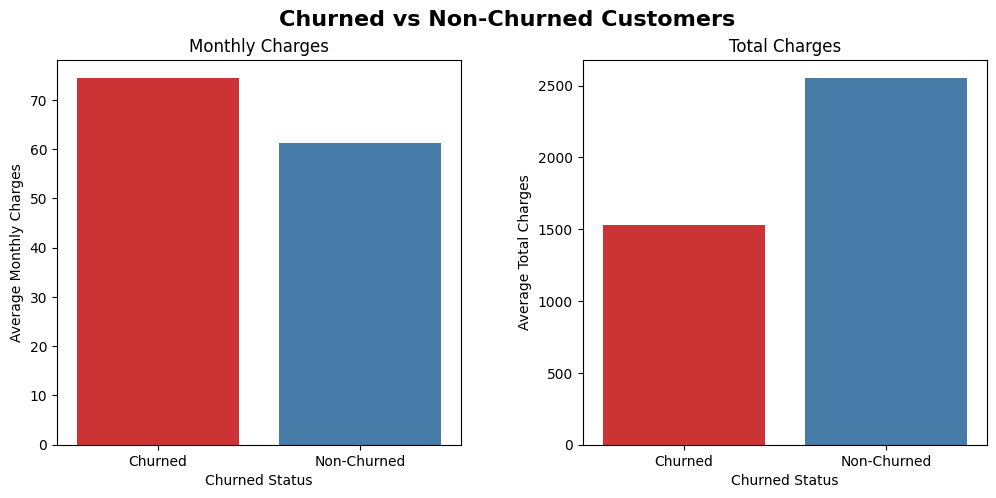

In [52]:
# Plot the churned and non-churned customers' monthly and total charges

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle('Churned vs Non-Churned Customers', fontsize=16, fontweight='bold')
fig.subplots_adjust(wspace=0.3)

sns.barplot(x=churn_monthly.index, y=churn_monthly.values, palette='Set1', ax=axes[0])
axes[0].set_title('Monthly Charges')
axes[0].set_ylabel('Average Monthly Charges')
axes[0].set_xlabel('Churned Status')
sns.barplot(x=churn_total.index, y=churn_total.values, palette='Set1', ax=axes[1])
axes[1].set_title('Total Charges')
axes[1].set_ylabel('Average Total Charges')
axes[1].set_xlabel('Churned Status')
plt.show()


# Hint

1. **High Churn rate** is seen for the customers **without dependants, online security, tech support**. Also customers who use **electronic checks** as a payment method, who use **the service** less than 1 year and who have **month-to-month** contracts are likely to churn frequently.

2. **Lower Churn rate** is seen for the customers that **use the service more than 4 years**, that have **one-year/two-year contracts** and for the customers **without internet service, streamingTV and streamingMovies.**

3. Almost no impact on churn rate include **gender, streamingTV, streamingMovies, and MultipleLine**.

In [53]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)


In [54]:
dataset = df.copy()

In [55]:
dataset.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [56]:
# Yes/No columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
columns = list(dataset.columns)
categoric_columns = []
yes_no_columns = []
numeric_columns = []

for i in columns:
    if len(dataset[i].unique()) > 6:
        numeric_columns.append(i)
    elif len(dataset[i].unique()) == 2:
        yes_no_columns.append(i)
    else:
        categoric_columns.append(i)

#categoric_columns = categoric_columns[:-1]

print('Numeric features:', numeric_columns)
print("---"*10)
print('Yes/No columns:', yes_no_columns)
print("---"*10)
print('Categorical features:', categoric_columns)

Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']
------------------------------
Yes/No columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
------------------------------
Categorical features: ['InternetService', 'Contract', 'PaymentMethod']


# Min-Max Scaling

scale the data to a fixed range (0 and 1)
```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
```

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])


# Encoding All Categorical variable

In [58]:
columns = list(dataset.columns)
categoric_columns = []
yes_no_columns = []
numeric_columns = []

for i in columns:
    if len(dataset[i].unique()) > 6:
        numeric_columns.append(i)
    elif len(dataset[i].unique()) == 2:
        yes_no_columns.append(i)
    else:
        categoric_columns.append(i)
    
print('Numeric features:', numeric_columns)
print("---"*10)
print('Yes/No columns:', yes_no_columns)
print("---"*10)
print('Categorical features:', categoric_columns)


Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges']
------------------------------
Yes/No columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
------------------------------
Categorical features: ['InternetService', 'Contract', 'PaymentMethod']


# Label Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in yes_no_columns:
    dataset[col] = le.fit_transform(dataset[col])

In [60]:
dataset.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.521891,0.015330,1


In [61]:
dataset = pd.get_dummies(dataset, columns=categoric_columns)

<Axes: >

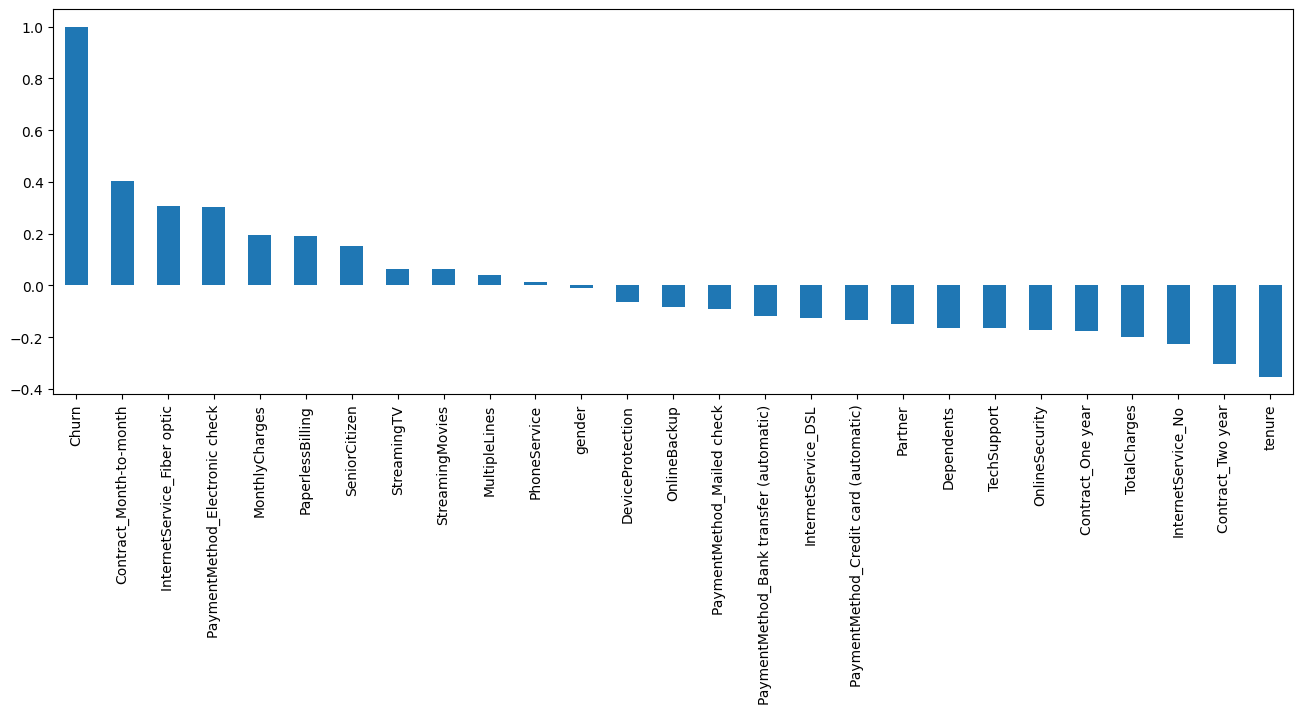

In [62]:
plt.figure(figsize=(16,5))
dataset.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [63]:
churn_count = dataset.Churn.value_counts()
churn_ratio = churn_count[0] / churn_count[1]
print(f'Churn Ratio: {churn_ratio:.2f}')

Churn Ratio: 2.77


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(data):
    vif = pd.DataFrame({
        'Features' : data.columns,
        'VIF' : [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    })
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif


In [65]:
data2 

,TotalCharges,MonthlyCharges,tenure
0,29.85,29.85,1
1,1889.50,56.95,34
2,108.15,53.85,2
3,1840.75,42.30,45
4,151.65,70.70,2
...,...,...,...
7027,1990.50,84.80,24
7028,7362.90,103.20,72
7029,346.45,29.60,11
7030,306.60,74.40,4


In [66]:
VIF(data2)

,Features,VIF
0,TotalCharges,8.079181
1,tenure,6.332432
2,MonthlyCharges,3.361075


In [67]:
data3 = data2.drop('TotalCharges', axis=1)

In [68]:
data3.head()

,MonthlyCharges,tenure
0,29.85,1
1,56.95,34
2,53.85,2
3,42.30,45
4,70.70,2


In [69]:
VIF(data3)

,Features,VIF
0,tenure,2.615492
1,MonthlyCharges,2.615492


In [70]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.472222,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,0.027778,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.625000,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,0.027778,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [71]:
dataset.drop('TotalCharges', axis = 1, inplace=True)
X = dataset.drop('Churn', axis=1)
y = dataset.Churn

# Spliting stage

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Bulding

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [74]:
model = LogisticRegression(random_state=2025)
model.fit(x_train, y_train)

LogisticRegression(random_state=2025)

In [75]:
def model_eval(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    error = 1 - accuracy
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specitivity = tn / (tn + fp)
    f1 = 2 * (precision * recall) / (precision + recall)
    results = pd.DataFrame({
        'Accuracy': accuracy,
        'Error': error,
        'Precision': precision,
        'Recall': recall,
        'Specitivity': specitivity,
        'F1 Score': f1
    }, index=[0])
    return results

In [76]:
y_pred = model.predict(x_test)
model_eval(y_test, y_pred)

,Accuracy,Error,Precision,Recall,Specitivity,F1 Score
0,0.82115,0.17885,0.692063,0.58445,0.906371,0.633721


In [77]:
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(x_test)).ravel()
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')
print(f'Accuracy: {accuracy_score(y_test, model.predict(x_test)):.4f}')
print(f'Precision: {tp/(tp+fp):.4f}')
print(f'Recall: {tp/(tp+fn):.4f}')
print(f'F1 Score: {2*tp/(2*tp+fp+fn):.4f}')
print(classification_report(y_test, model.predict(x_test)))


True Negatives: 939
False Positives: 97
False Negatives: 155
True Positives: 218
Accuracy: 0.8211
Precision: 0.6921
Recall: 0.5845
F1 Score: 0.6337
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



# Feature Selection

Recursive Feature Elimination

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

n_features = 10
rfe = RFE(model, n_features_to_select=n_features)

X_train_selected = rfe.fit_transform(x_train, y_train)
X_test_selected = rfe.transform(x_test)

selected_feature_index = rfe.support_
selected_feature = x_train.columns[selected_feature_index]

print(f"Selected features: {selected_feature.tolist()}")
print(f"Number of selected features: {len(selected_feature)}")
print(f"Number of features before RFE: {x_train.shape[1]}")
print(f"Number of features after RFE: {X_train_selected.shape[1]}")

Selected features: ['tenure', 'PhoneService', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'MonthlyCharges', 'InternetService_Fiber optic', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)']
Number of selected features: 10
Number of features before RFE: 25
Number of features after RFE: 10


# Model building using RFE

In [79]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('gender', False, 14),
 ('SeniorCitizen', False, 8),
 ('Partner', False, 15),
 ('Dependents', False, 10),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('MultipleLines', False, 6),
 ('OnlineSecurity', True, 1),
 ('OnlineBackup', False, 9),
 ('DeviceProtection', False, 16),
 ('TechSupport', True, 1),
 ('StreamingTV', False, 7),
 ('StreamingMovies', False, 5),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('InternetService_DSL', False, 11),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', False, 4),
 ('Contract_Month-to-month', True, 1),
 ('Contract_One year', False, 13),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 3),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 12),
 ('PaymentMethod_Mailed check', False, 2)]

In [80]:
x_select = x_train[x_train.columns[rfe.support_]]
len(x_select.columns)

10

In [81]:
len(x_train.columns)

25

In [82]:
x_select.head()

,tenure,PhoneService,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,Contract_Month-to-month,Contract_Two year,PaymentMethod_Credit card (automatic)
2142,0.291667,1,1,0,0,0.463682,False,False,False,False
1623,0.750000,1,0,0,1,0.785572,True,False,True,False
6074,0.013889,0,0,0,1,0.051741,False,True,False,False
1362,0.055556,1,0,0,1,0.516915,True,True,False,False
6754,0.000000,1,1,1,1,0.434328,False,False,True,False


In [83]:
model2 = LogisticRegression()
model2.fit(x_select, y_train)

LogisticRegression()

In [84]:
coef = model2.coef_
feature_names = x_select.columns

In [85]:
coef

array([[-2.3297975 , -1.05944205, -0.55610369, -0.47888341,  0.39011961,
         2.51293517,  0.43774983,  0.75925817, -0.81207793, -0.28380254]])

In [86]:
feature_names

Index(['tenure', 'PhoneService', 'OnlineSecurity', 'TechSupport',
       'PaperlessBilling', 'MonthlyCharges', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)'],
      dtype='object')

In [87]:
list(zip([feature_names], coef))

[(Index(['tenure', 'PhoneService', 'OnlineSecurity', 'TechSupport',
         'PaperlessBilling', 'MonthlyCharges', 'InternetService_Fiber optic',
         'Contract_Month-to-month', 'Contract_Two year',
         'PaymentMethod_Credit card (automatic)'],
        dtype='object'),
  array([-2.3297975 , -1.05944205, -0.55610369, -0.47888341,  0.39011961,
          2.51293517,  0.43774983,  0.75925817, -0.81207793, -0.28380254]))]

In [88]:
x_test = x_test[x_test.columns.intersection(x_select.columns)]

In [89]:
y_pred1 = model2.predict(x_test)

In [90]:
def model_eval(y_true, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp+tn) / (fp + fn + tp + tn)
    error = 1 - accuracy
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specifcity = tn / (fn + tn)
    f1_score = 2 * (recall * precision) / (recall + precision)
    result = {"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specficity':specifcity,'F1':f1_score}
    return result

In [91]:
model_eval(y_test, y_pred1)

{'Accuracy': 0.8183108587650816,
 'Error': 0.18168914123491842,
 'Precision': 0.9054054054054054,
 'Recall': 0.8558394160583942,
 'Specficity': 0.5764075067024129,
 'F1': 0.8799249530956847}

In [92]:
col = [y_test, y_pred1]
evaluated1 = [col]

In [93]:
x_test.shape, y_test.shape

((1409, 10), (1409,))

# Model building using L1 Regularization

In [94]:
model3 = LogisticRegression(penalty='l1', C = 0.1, solver='liblinear')
model3.fit(x_select, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [95]:
x_select.shape, x_test.shape

((5634, 10), (1409, 10))

In [96]:
x_test = x_test[x_select.columns]

In [97]:
#%pip install explainerdashboard

In [98]:
y_pred2 = model3.predict(x_test)

In [99]:
model_eval(y_test, y_pred2)

{'Accuracy': 0.8176011355571328,
 'Error': 0.18239886444286724,
 'Precision': 0.9083011583011583,
 'Recall': 0.8531278331822303,
 'Specficity': 0.5656836461126006,
 'F1': 0.8798503973819541}

In [100]:
model3.coef_

array([[-2.21013315, -0.94163077, -0.46705951, -0.37674277,  0.34458589,
         1.82682028,  0.64423071,  0.68576194, -0.70433779, -0.21877353]])

In [101]:
list(zip([feature_names], model3.coef_))

[(Index(['tenure', 'PhoneService', 'OnlineSecurity', 'TechSupport',
         'PaperlessBilling', 'MonthlyCharges', 'InternetService_Fiber optic',
         'Contract_Month-to-month', 'Contract_Two year',
         'PaymentMethod_Credit card (automatic)'],
        dtype='object'),
  array([-2.21013315, -0.94163077, -0.46705951, -0.37674277,  0.34458589,
          1.82682028,  0.64423071,  0.68576194, -0.70433779, -0.21877353]))]

# Feature importance

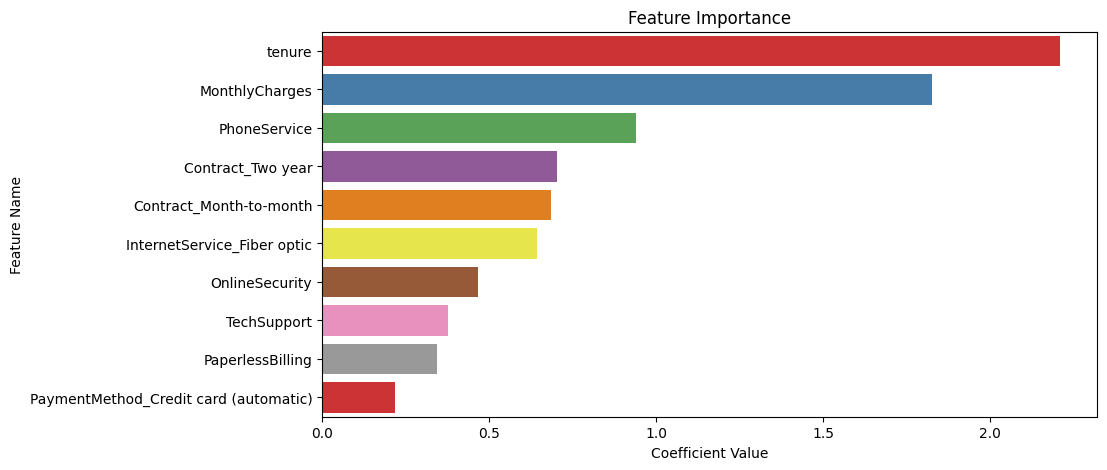

In [102]:
coef = pd.Series(abs(model3.coef_[0]), index=x_select.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.title('Feature Importance')
ax = sns.barplot(y=coef.index, x=coef.values, palette='Set1', orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()

# Model Evaluation

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

auc = roc_auc_score(y_test, y_pred)

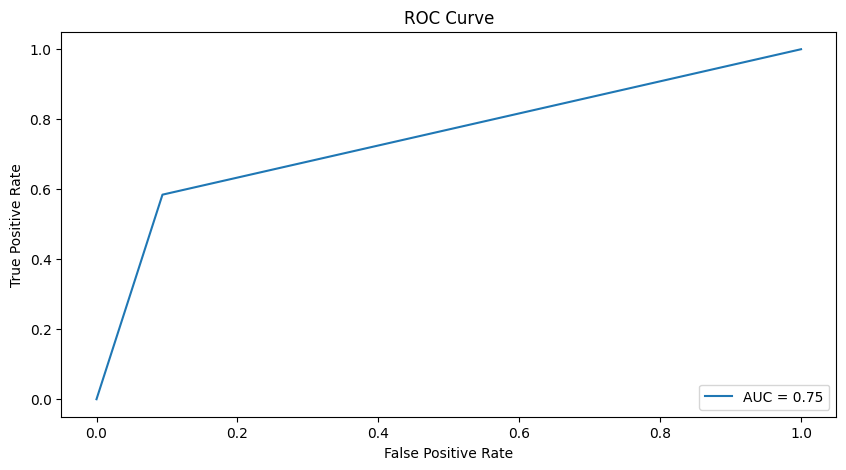

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

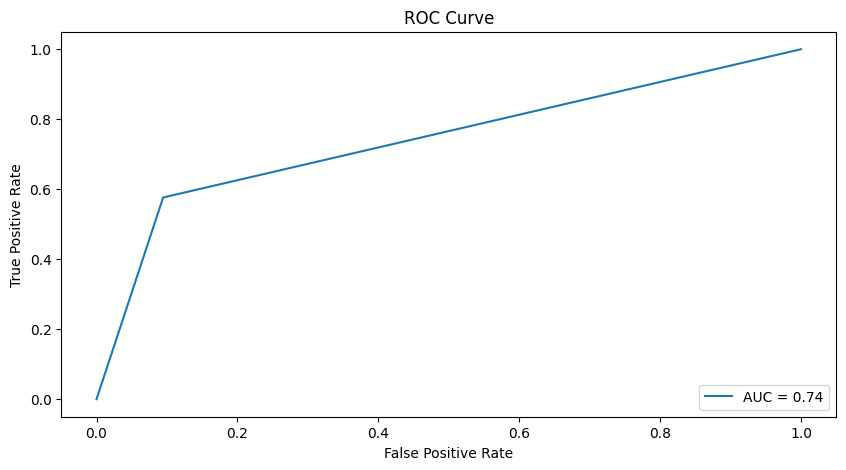

In [105]:
auc = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label = 'AUC = %.2f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

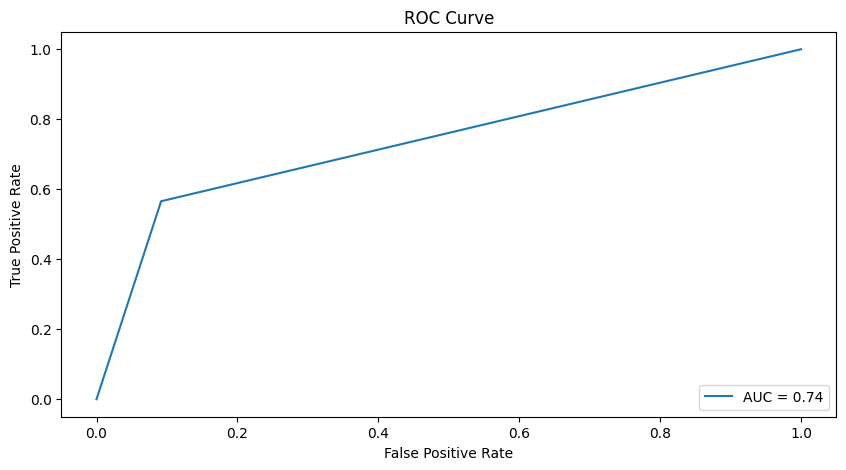

In [106]:
auc = roc_auc_score(y_test, y_pred2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

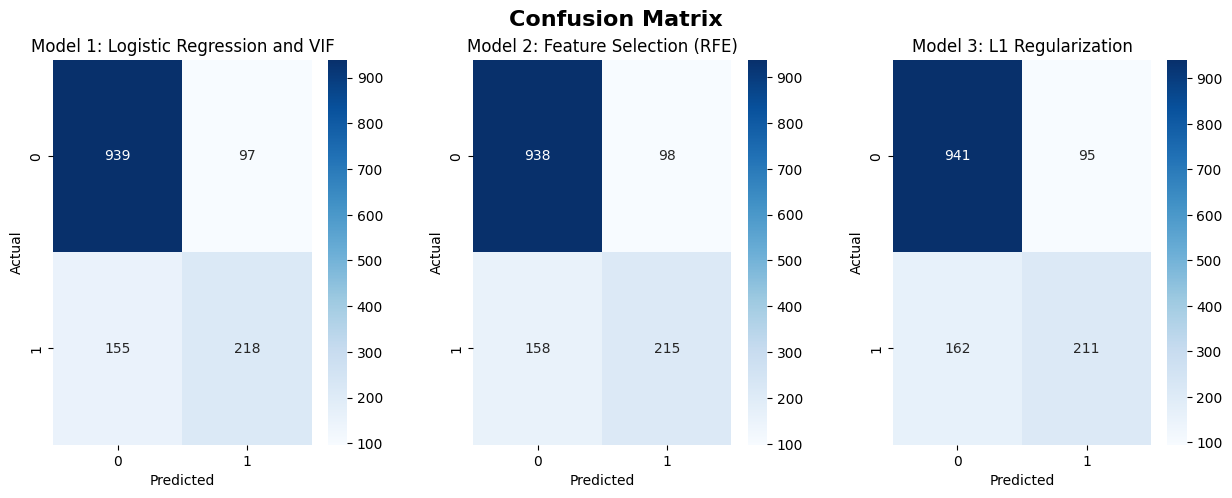

In [112]:
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred1)
cm3 = confusion_matrix(y_test, y_pred2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Confusion Matrix', fontsize=16, fontweight='bold')
fig.subplots_adjust(wspace=0.3)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Model 1: Logistic Regression and VIF')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Model 2: Feature Selection (RFE)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Model 3: L1 Regularization')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.show()

# Save

In [113]:
import pickle 
saved_model = pickle.dump(model3, open('customer_churn.sav', 'wb'))
logistic_model = pickle.load(open('customer_churn.sav', 'rb'))

In [119]:
x_test

,tenure,PhoneService,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_Fiber optic,Contract_Month-to-month,Contract_Two year,PaymentMethod_Credit card (automatic)
185,0.013889,0,0,0,1,0.065174,False,True,False,False
2715,0.569444,1,0,0,1,0.069652,False,True,False,False
3825,0.722222,1,0,0,0,0.010945,False,False,True,False
1807,0.013889,1,0,0,0,0.578109,True,True,False,False
132,0.930556,1,0,1,0,0.321393,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
6366,0.888889,1,0,1,1,0.498010,False,False,True,False
315,0.708333,1,1,1,0,0.913433,True,False,False,True
2439,0.236111,1,0,0,0,0.016418,False,False,False,False
5002,0.958333,0,1,0,1,0.255721,False,False,True,True


In [117]:
logistic_model.predict([[0 ,0.253521 ,1 ,0 ,1 ,0 ,0 ,0.397512, 0 ,1]])

array([0])